In [1]:
from loica import *
import matplotlib.pyplot as plt

In [5]:
# number of nodes in ring
N = 5

In [10]:
ring = GeneticNetwork()

regs = [Regulator(name=f'Rep{i}', degradation_rate=1) for i in range(N)]
ring.add_regulators(regs)

reps = [Reporter(name=f'SFP{i}', color='blue', degradation_rate=1) for i in range(N)]
ring.add_reporters(reps)

nots = [Hill1(input=regs[i], output=regs[(i+1)%N], alpha=[10,0], K=1, n=2) for i in range(N)]
ring.add_operators(nots)

nots = [Hill1(input=regs[i], output=reps[i], alpha=[10,0], K=1, n=2) for i in range(N)]
ring.add_operators(nots)

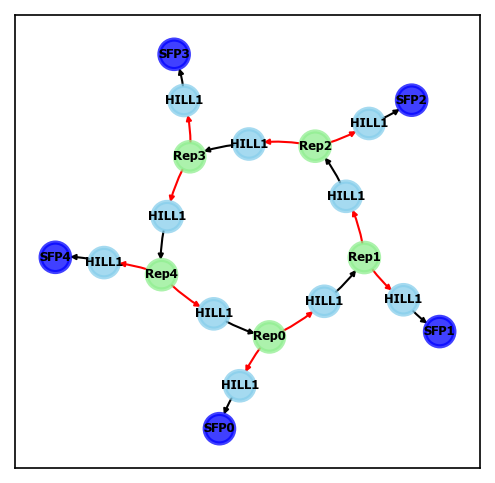

In [11]:
plt.figure(figsize=(4,4), dpi=150)
ring.draw()

In [ ]:
def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 0.5)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 0.5)

metab = SimulatedMetabolism(biomass, growth_rate)

In [ ]:
regs[0].init_concentration = 1

In [ ]:
sample = Sample(genetic_network=ring, 
                    metabolism=metab)

In [ ]:
assay = Assay([sample], 
              n_measurements=300, 
              interval=0.24,
              name=f'Loica {N} node ring network',
              description='Simulated ring network generated by loica'
             )
assay.run()

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
for i in range(N):
    m[m.Signal==f'SFP{i}'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend([f'SFP{i}' for i in range(N)])